In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

# Plot effective survey area

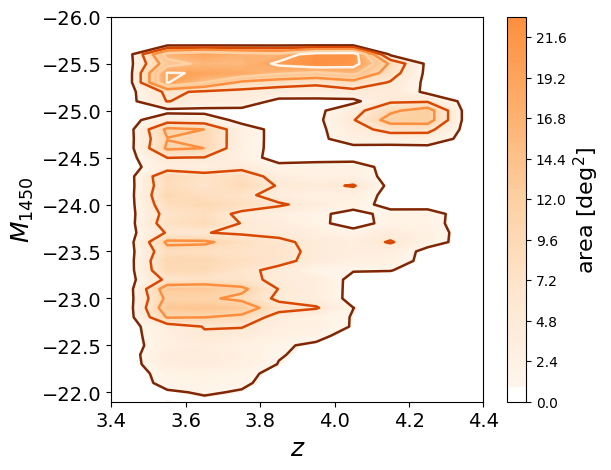

In [2]:
plt.figure(figsize=(6,5))

effArea=np.loadtxt('BHMF_ERDF/effArea.dat')

y=np.arange(-20,-27.01,-0.1)
x=np.arange(3.05,4.86,0.1)
X,Y=np.meshgrid(x, y)

cs=plt.contourf(X, Y, effArea, 80, vmin=0.5,vmax=45,cmap='Oranges',origin='lower')
cs.cmap.set_under('w')
cs.set_clim(1)
plt.colorbar().set_label(label='area [deg$^2$]',fontsize=16)

plt.contour(X, Y, (effArea-np.mean(effArea))/np.std(effArea),5,vmin=0,vmax=6,cmap=plt.cm.Oranges_r,\
            origin='lower',linewidths=1.8)

plt.xlim([3.4,4.4])
plt.ylim([-26.,-21.9])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$z$',fontsize=18)
plt.ylabel('$M_{1450}$',fontsize=18)
plt.gca().invert_yaxis()
plt.show()

# Plot BHMF and ERDF

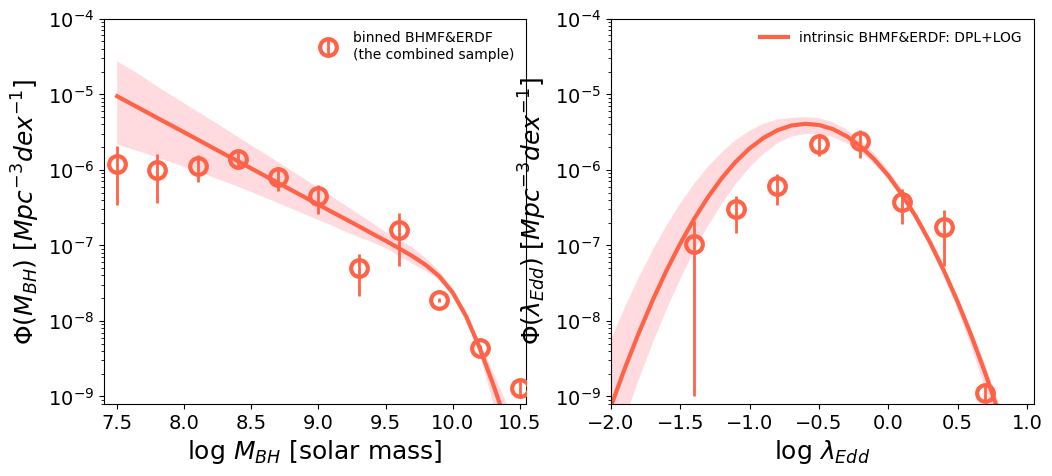

In [5]:
binBHMF=Table.read('BHMF_ERDF/binBHMF.csv')
binERDF=Table.read('BHMF_ERDF/binERDF.csv')
intBHMF=Table.read('BHMF_ERDF/intrinsicBHMF.csv')
intERDF=Table.read('BHMF_ERDF/intrinsicERDF.csv')

plt.figure(figsize=(12,5))

plt.subplot(121)

plt.errorbar(binBHMF['log M_BH'],binBHMF['Phi_tot'],yerr=binBHMF['Phi_tot_err'],fmt='o',color='tomato',mfc='none',ms=12,mew=3,lw=2,capthick=0,\
             label='binned BHMF&ERDF \n(the combined sample)',zorder=10)

plt.plot(intBHMF['log M_BH'],intBHMF['Phi_tot'],'-',color='tomato',lw=3)
plt.fill_between(intBHMF['log M_BH'],intBHMF['Phi_tot_err_low'],intBHMF['Phi_tot_err_up'],facecolor='lightpink',edgecolors='none',alpha=0.5)

plt.xlabel('log $M_{BH}$ [solar mass]',fontsize=18)
plt.ylabel('$\Phi(M_{BH})$ [$Mpc^{-3} dex^{-1}$]',fontsize=18)
plt.yscale('log')
plt.ylim([8e-10,1e-4])
plt.xlim([7.4,10.55])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper right',fontsize=10,frameon=False)

plt.subplot(122)

plt.errorbar(binERDF['log Edd'],binERDF['Phi_tot'],yerr=binERDF['Phi_tot_err'],fmt='o',color='tomato',mfc='none',ms=12,mew=3,lw=2,capthick=0,\
             zorder=10)

plt.plot(intERDF['log Edd'],intERDF['Phi_tot'],'-',color='tomato',lw=3,label='intrinsic BHMF&ERDF: DPL+LOG')
plt.fill_between(intERDF['log Edd'],intERDF['Phi_tot_err_low'],intERDF['Phi_tot_err_up'],facecolor='lightpink',edgecolors='none',alpha=0.5)

plt.xlabel('log $\lambda_{Edd}$',fontsize = 18)
plt.ylabel('$\Phi(\lambda_{Edd})$ [$Mpc^{-3} dex^{-1}$]',fontsize = 18)
plt.yscale('log')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([8e-10,1e-4])
plt.xlim([-2,1.05])
plt.legend(loc='upper right',fontsize=10,frameon=False)

plt.show()